<a href="https://colab.research.google.com/github/alwaysalearner1234/ML03/blob/main/Naive_Bayes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()


,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [8]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [9]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9770279971284996

Sklearn Pipeline

In [10]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [11]:
clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [12]:
clf.score(X_test,y_test)

0.9770279971284996

In [13]:
clf.predict(emails)


array([0, 1])

Machine Learning Tutorial - Naive Bayes: Exercise
Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
🧮 Model Performance:
-----------------------------
GaussianNB Accuracy: 1.0
MultinomialNB Accuracy: 0.889

📈 Classification Report (GaussianNB):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


📉 Classification Report (MultinomialNB):
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.93      0.93      0.93     

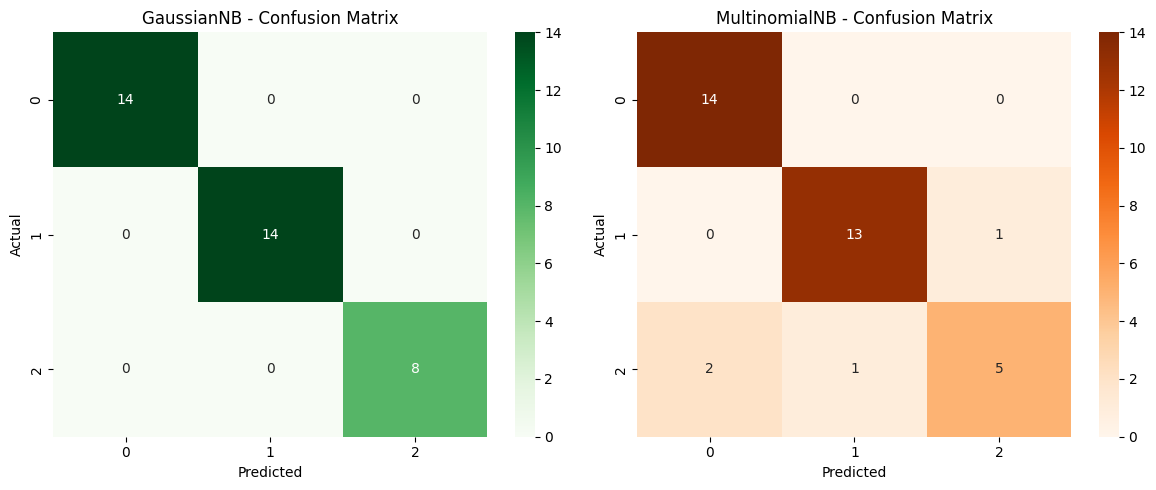


🔮 Sample Predictions (GaussianNB):
Sample 1 → Predicted: class_0, Actual: class_0
Sample 2 → Predicted: class_0, Actual: class_0
Sample 3 → Predicted: class_2, Actual: class_2
Sample 4 → Predicted: class_0, Actual: class_0
Sample 5 → Predicted: class_1, Actual: class_1


In [14]:
# -------------------------------
# Machine Learning Tutorial - Naive Bayes Exercise
# Using Wine Dataset (from sklearn.datasets)
# -------------------------------

# 1️⃣ Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2️⃣ Load the dataset
wine = load_wine()
X = wine.data
y = wine.target

print("Feature names:", wine.feature_names)
print("Target classes:", wine.target_names)

# 3️⃣ Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4️⃣ Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# 5️⃣ Train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# 6️⃣ Evaluate both models
print("🧮 Model Performance:")
print("-----------------------------")
print("GaussianNB Accuracy:", round(accuracy_score(y_test, y_pred_gnb), 3))
print("MultinomialNB Accuracy:", round(accuracy_score(y_test, y_pred_mnb), 3))

print("\n📈 Classification Report (GaussianNB):\n", classification_report(y_test, y_pred_gnb))
print("\n📉 Classification Report (MultinomialNB):\n", classification_report(y_test, y_pred_mnb))

# 7️⃣ Visualize confusion matrices for both models
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Greens')
plt.title("GaussianNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Oranges')
plt.title("MultinomialNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# 8️⃣ Predict on sample test data using the better model (GaussianNB)
sample = X_test[:5]
predictions = gnb.predict(sample)

print("\n🔮 Sample Predictions (GaussianNB):")
for i in range(len(sample)):
    print(f"Sample {i+1} → Predicted: {wine.target_names[predictions[i]]}, Actual: {wine.target_names[y_test[i]]}")
